# **Part 2: Individual analytics report**

### **A Data-Driven Study of Pricing, Discounts, and Economic Indicators**

**Student Name:**

**Student Number:**

**Course:** 

**Github link**

https://github.com/usersdemo552-del/python_part2

### Importing python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading sales dataset

In [2]:
sales= pd.read_csv("daraz_processed_tshirt_sales_data.csv")

In [3]:
lpi=pd.read_excel("LPI & GCI.xlsx") #loading the dataset

### Inspection of sales data

In [4]:
sales.head()

,Product Name,Gender,Color,Sleeve Type,Material,Combo Item,Price,Discount(%),No. of Sells,No. of Review,Location,Product Link,Product ID,SKU
0,Multi Color T Shirt For Men - Comfortable,Male,Multicolor,NaN,NaN,NaN,90,55%,494,6,Dhaka,www.daraz.com.bd/products/-i391780667.html,391780667,391780667_BD-1954935650
1,Bodro hobo Indispensable -Quality And Durablit...,Male,NaN,NaN,NaN,NaN,90,70%,737,12,Dhaka,www.daraz.com.bd/products/bodro-hobo-bula-jao-...,390104095,390104095_BD-1947321519
2,Mens New Stylish Tshirt & Short Pent Combo,NaN,NaN,NaN,NaN,Combo,398,34%,605,43,Dhaka,www.daraz.com.bd/products/-i389255983.html,389255983,389255983_BD-1940255191
3,Kal Thike vordo hobo New Desing Digital printe...,NaN,NaN,NaN,NaN,NaN,99,50%,272,15,Dhaka,www.daraz.com.bd/products/kal-thike-i391044280...,391044280,391044280_BD-1952491769
4,Always Smile Jersey T-Shirt For Man| Half Slee...,Male,NaN,Half Sleeve,NaN,NaN,97,61%,2000,81,Dhaka,www.daraz.com.bd/products/-i334125624.html,334125624,334125624_BD-1625716529


In [5]:
lpi.head() #showing the data columns

,Year,Country,Region,Import,Export,Total,Trade Balance,GDP,Population,Quality of overall infrastructure,Quality of roads,Quality of railroad infrastructure,Quality of port infrastructure,Quality of air transport infrastructure
0,2007,Algeria,South Asia,3.022000e+06,4.540000e+05,3.476000e+06,-2.568000e+06,321.441,26616.792,3.1,0.0,0,0.0,0.0
1,2007,Albania,Europe,4.200864e+06,1.077690e+06,5.278554e+06,-3.123174e+06,3594.100,3023.907,3.5,0.0,0,0.0,0.0
2,2007,Algeria,Africa,2.763120e+07,6.016316e+07,8.779436e+07,3.253196e+07,3986.560,34300.076,3.1,0.0,0,0.0,0.0
3,2007,Angola,Africa,1.366100e+07,4.417778e+07,5.783878e+07,3.051678e+07,3099.090,20997.687,2,0.0,0,0.0,0.0
4,2007,Argentina,South America,4.470704e+07,5.577958e+07,1.004866e+08,1.107254e+07,7315.730,39970.224,4,0.0,0,0.0,0.0


In [6]:
sales.info()   #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0               Product Name  3279 non-null   object
 1   Gender                    2454 non-null   object
 2   Color                     801 non-null    object
 3   Sleeve Type               879 non-null    object
 4   Material                  581 non-null    object
 5   Combo Item                669 non-null    object
 6               Price         3280 non-null   int64 
 7               Discount(%)   3171 non-null   object
 8   No. of Sells              3280 non-null   int64 
 9   No. of Review             3280 non-null   int64 
 10              Location      3280 non-null   object
 11              Product Link  3280 non-null   object
 12              Product ID    3280 non-null   int64 
 13              SKU           3280 non-null   object
dtypes: int64(4), object(10)


In [7]:
lpi.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     806 non-null    int64  
 1   Country                                  806 non-null    object 
 2   Region                                   796 non-null    object 
 3   Import                                   806 non-null    float64
 4   Export                                   806 non-null    float64
 5   Total                                    806 non-null    float64
 6   Trade Balance                            806 non-null    float64
 7   GDP                                      806 non-null    float64
 8   Population                               806 non-null    float64
 9   Quality of overall infrastructure        806 non-null    object 
 10  Quality of roads                         806 non-n

In [8]:
#selecting specific country from the dataset
bangladesh_lpi = lpi[lpi['Country'] == 'Bangladesh']
bangladesh_lpi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 10 to 685
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     6 non-null      int64  
 1   Country                                  6 non-null      object 
 2   Region                                   6 non-null      object 
 3   Import                                   6 non-null      float64
 4   Export                                   6 non-null      float64
 5   Total                                    6 non-null      float64
 6   Trade Balance                            6 non-null      float64
 7   GDP                                      6 non-null      float64
 8   Population                               6 non-null      float64
 9   Quality of overall infrastructure        6 non-null      object 
 10  Quality of roads                         6 non-null     

### Data management

#### Finding null values

In [9]:
sales.isnull().sum()

            Product Name       1
Gender                       826
Color                       2479
Sleeve Type                 2401
Material                    2699
Combo Item                  2611
            Price              0
            Discount(%)      109
No. of Sells                   0
No. of Review                  0
            Location           0
            Product Link       0
            Product ID         0
            SKU                0
dtype: int64

In [10]:
bangladesh_lpi.isnull().sum() #finding null values

Year                                       0
Country                                    0
Region                                     0
Import                                     0
Export                                     0
Total                                      0
Trade Balance                              0
GDP                                        0
Population                                 0
Quality of overall infrastructure          0
Quality of roads                           0
Quality of railroad infrastructure         0
Quality of port infrastructure             0
Quality of air transport infrastructure    0
dtype: int64

### Cleaning column names

In [11]:
sales.columns = (
    sales.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False))

### Missing value treatment

In [12]:
categorical_cols = ['gender', 'color', 'sleeve_type',
    'material', 'combo_item']
sales[categorical_cols] = sales[categorical_cols].fillna('Unknown')

All the columns of the dataset were cleaned by removing whitespace, converting to lowercase, and replacing special characters for error-free and consistent manipulation.

### Converting discount(%) to numeric

In [13]:
sales['discount'] = (
    sales['discount%']
    .str.replace('%', '', regex=False)
    .astype(float))
sales.drop(columns=['discount%'], inplace=True)

There are several categorical columns containing missing values, and the missing values are replaced with “unknown” to avoid loss of informative data from the sales data.

In [14]:
# Replacing missing discounts with 0
sales['discount'] = sales['discount'].fillna(0)
# dropping missing value product_name
sales = sales.dropna(subset=['product_name'])

### Checking duplicate values

In [15]:
sales.duplicated().sum()

1641

In the case of the “discount%” column, the field was cleaned by removing the percentage symbol and converting the column to a numeric format. The null values of the column were replaced with 0, and the value indicates that no discount is applied to the product sales.

### Removing duplicate values

In [16]:
sales = sales.drop_duplicates()

### Data wrangling

In [17]:
# price bands
sales['price_band'] = pd.qcut(
    sales['price'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Premium'])

In [18]:
# Discount band
sales['discount_band'] = pd.qcut(
    sales['discount'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High'])

In [19]:
# Sales per review
sales['sales_per_review'] = (
    sales['no._of_sells'] / (sales['no._of_review'] + 1))

The data wrangling method is used to create categorical columns using quartile segmentation, and this section allows for making comparisons of product performance based on pricing levels.

### Data analysis

In [20]:
sales.groupby('gender')['no._of_sells'].mean().sort_values(ascending=False)

gender
Female     650.434783
Male       638.379964
Unknown    631.508434
Name: no._of_sells, dtype: float64

In [21]:
sales.groupby('price_band')['no._of_sells'].mean()

price_band
Low        353.934874
Medium     660.204082
High       954.946472
Premium    629.399510
Name: no._of_sells, dtype: float64

In [22]:
sales.groupby('discount_band')['no._of_sells'].mean()

discount_band
Low          478.574468
Medium       450.162946
High         933.011080
Very High    746.980296
Name: no._of_sells, dtype: float64

In [23]:
sales.groupby('location')['no._of_sells'].mean().sort_values(ascending=False).head(10)

location
Rangpur       1184.450000
Rajshahi      1000.352941
Dhaka          636.384565
Sylhet         612.000000
Barishal       485.000000
Chattogram     102.800000
Khulna          42.913043
Overseas         8.000000
Mymensingh       0.000000
Name: no._of_sells, dtype: float64

### Data visualisation

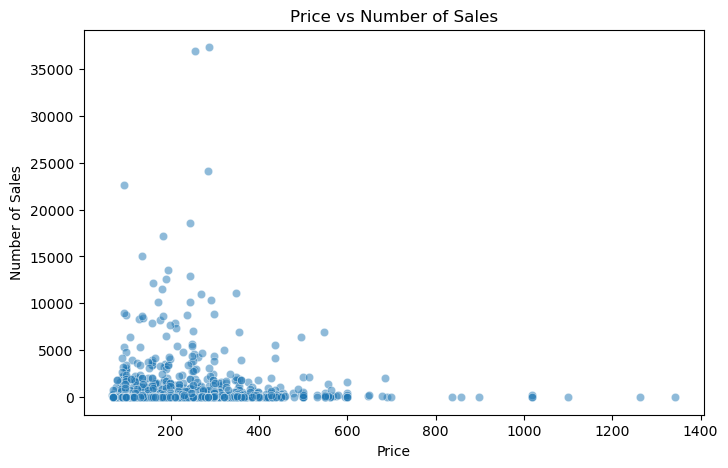

In [24]:
# Price vs Number of Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x=sales['price'], y=sales['no._of_sells'], alpha=0.5)
plt.title('Price vs Number of Sales')
plt.xlabel('Price')
plt.ylabel('Number of Sales')
plt.show()

In [25]:
# Finding top 10 products
top10_price = (
    sales[['product_name', 'price', 'no._of_sells', 'discount']]
    .sort_values(by='price', ascending=False)
    .head(10))

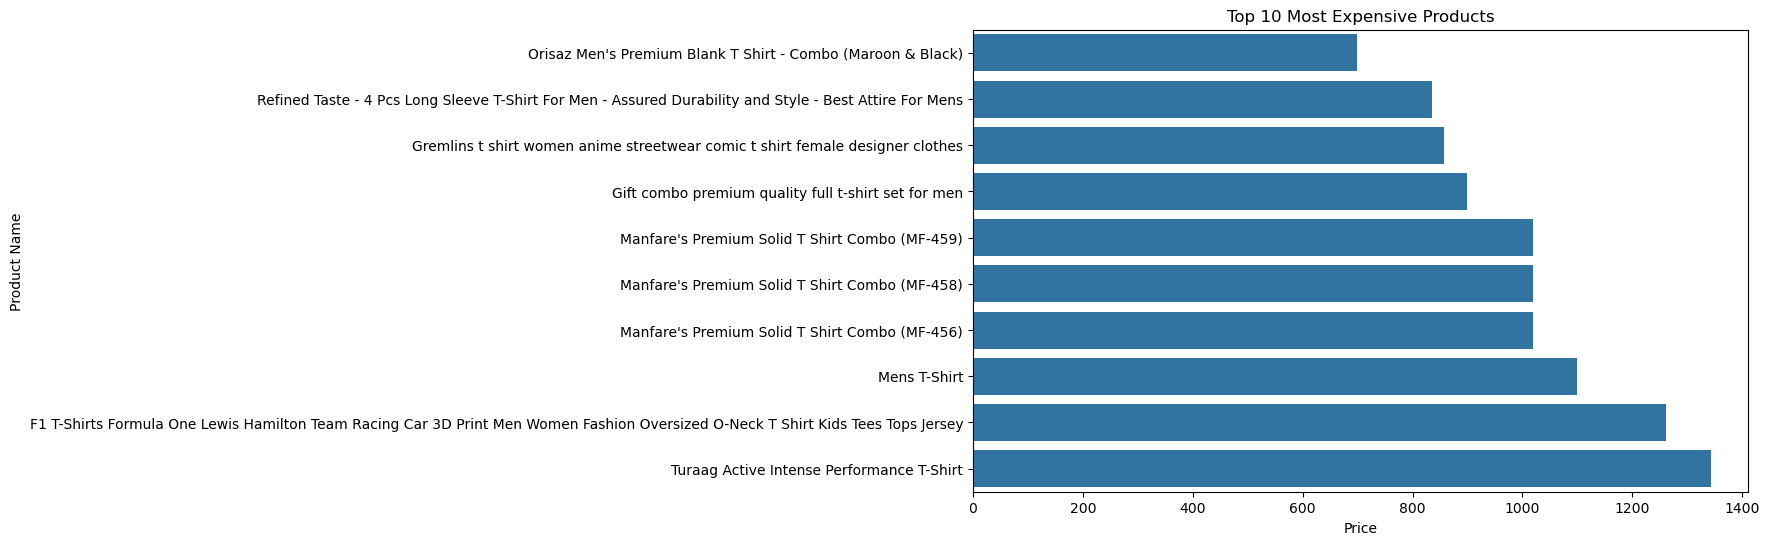

In [26]:
# top 10 most expensive products 
plt.figure(figsize=(10,6))
sns.barplot(data=top10_price, y='product_name', x='price')
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Price')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

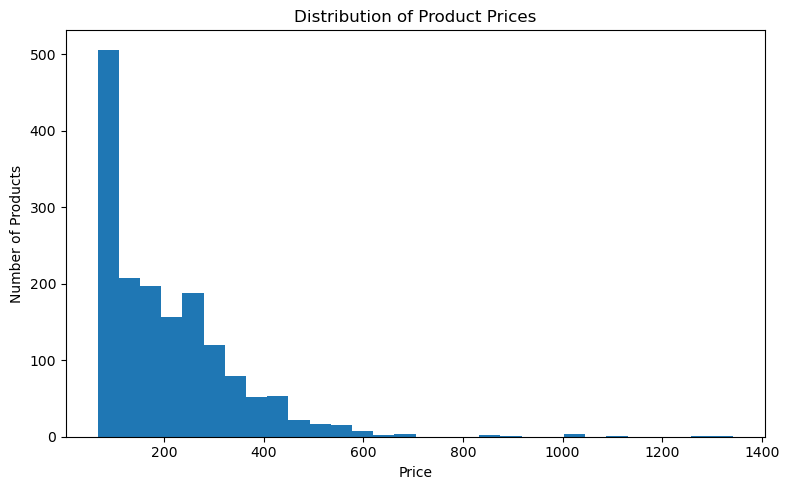

In [27]:
#distribution of product price
plt.figure(figsize=(8,5))
plt.hist(sales['price'], bins=30)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

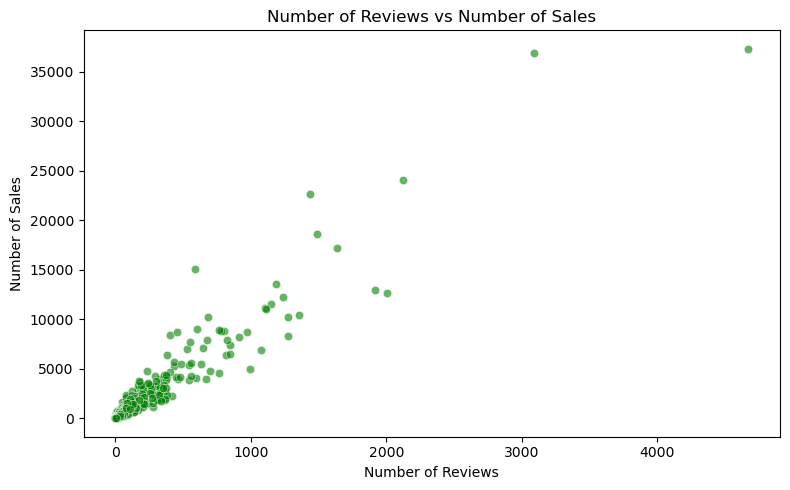

In [28]:
#customer engagement analysis
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=sales['no._of_review'],
    y=sales['no._of_sells'],
    color='green',
    alpha=0.6)
plt.title('Number of Reviews vs Number of Sales')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()

## Macro analysis

### Data wrangling

In [29]:
bangladesh_lpi['gdp_per_capita'] = (
    bangladesh_lpi['GDP'] / bangladesh_lpi['Population'])

### Data visualisation

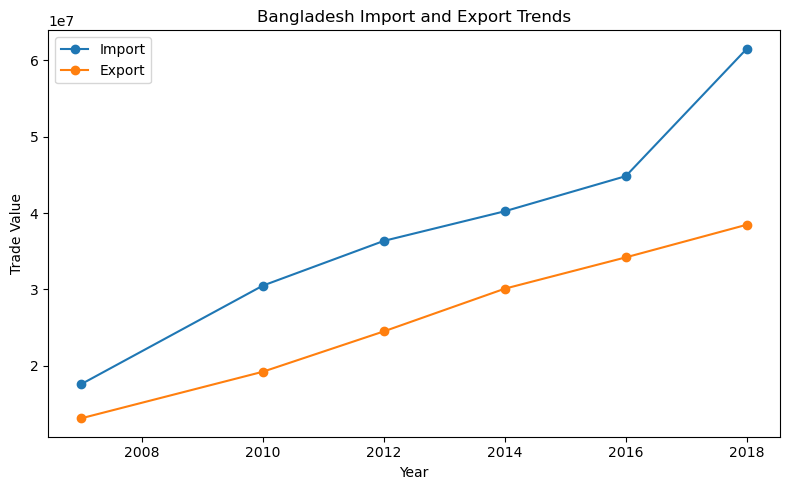

In [30]:
#Trade Performance Over Time (Import vs Export)
plt.figure(figsize=(8,5))
plt.plot(
    bangladesh_lpi['Year'],
    bangladesh_lpi['Import'],
    marker='o',
    label='Import')
plt.plot(
    bangladesh_lpi['Year'],
    bangladesh_lpi['Export'],
    marker='o',
    label='Export')
plt.title('Bangladesh Import and Export Trends')
plt.xlabel('Year')
plt.ylabel('Trade Value')
plt.legend()
plt.tight_layout()
plt.show()

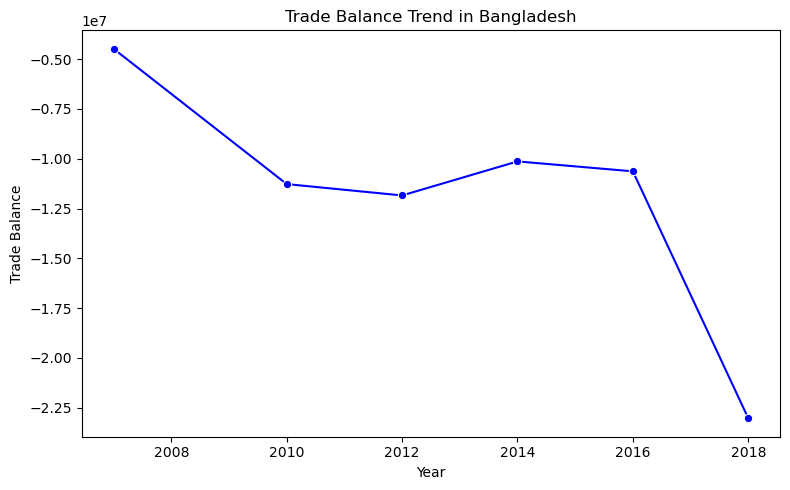

In [31]:
#Trade balance over time
plt.figure(figsize=(8,5))
sns.lineplot(
    x=bangladesh_lpi['Year'],
    y=bangladesh_lpi['Trade Balance'],
    marker='o',
    color='blue')
plt.title('Trade Balance Trend in Bangladesh')
plt.xlabel('Year')
plt.ylabel('Trade Balance')
plt.tight_layout()
plt.show()

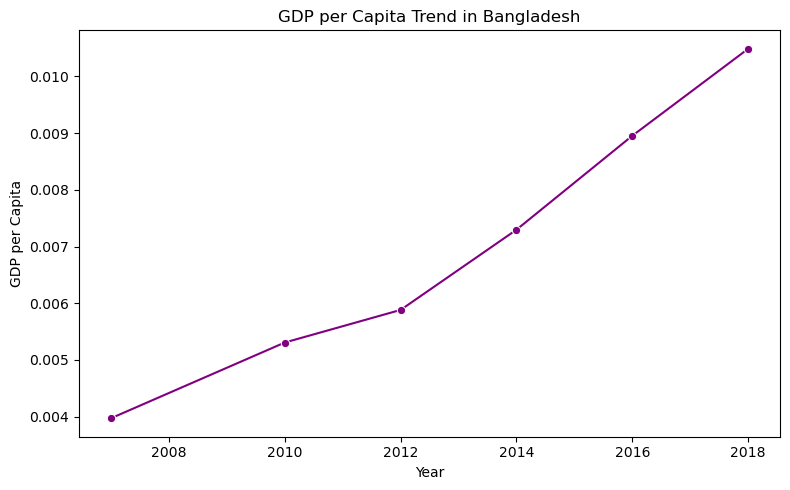

In [33]:
plt.figure(figsize=(8,5))
sns.lineplot(
    x=bangladesh_lpi['Year'],
    y=bangladesh_lpi['gdp_per_capita'],
    marker='o',
    color='purple')
plt.title('GDP per Capita Trend in Bangladesh')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.tight_layout()
plt.show()

In [34]:
bangladesh_lpi.to_csv("D:/data/bangladesh_lpi.csv", index=False)
sales.to_csv("D:/data/daraz_sales_cleaned.csv", index=False)

## Challenges encountered

Various issues were met such as the processing of huge amounts of missing and duplicate data, inconsistent column formats and conversion of discount values to various numbers. Also, the lack of a common key between two separate datasets analysed did not allow integrating the data, and instead, macro- and micro-level analysis had to be conducted independently in order to get meaningful information.